# softmax 回归的简洁实现

和线性回归一样，我们使用学习框架的高级 API 能使得 softmax 回归变得更加人容易，继续使用Fashion‐MNIST数据集，并保持批量大小为256。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 初始化模型参数

softmax回归的输出层是一个全连接层。因此，为了实现我们的模型，我们只需
在Sequential中添加一个带有10个输出的全连接层。同样，在这里Sequential并不是必要的，但它是实现
深度模型的基础。我们仍然以均值0和标准差0.01随机初始化权重。

In [3]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784,10))

def init_weights(m):
    if type(m) == nn.Linear():
        nn.init.normal_(m.weight, std = 0.01)
        
net.apply(init_weights)

TypeError: __init__() missing 2 required positional arguments: 'in_features' and 'out_features'

## 重新审视 Softmax 的实现

在前面3.6节的例子中，我们计算了模型的输出，然后将此输出送入交叉熵损失。从数学上讲，这是一件完全
合理的事情。然而，从计算角度来看，指数可能会造成数值稳定性问题。

首先,softmax函数$\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$，如果$o_k$中的一些数值非常大， 那么$\exp(o_k)$可能大于数据类型容许的最大数字，即上溢（overflow）。 这将使分母或分子变为inf（无穷大）， 最后得到的是0、inf或nan（不是数字）的
。 在这些情况下，我们无法得到一个明确定义的交叉熵值。

解决这个问题，有一个方法，类似于二分查找中上下溢出的处理方法:
$$
\begin{split}\begin{aligned}
\hat y_j & =  \frac{\exp(o_j - \max(o_k))\exp(\max(o_k))}{\sum_k \exp(o_k - \max(o_k))\exp(\max(o_k))} \\
& = \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}.
\end{aligned}\end{split}
$$

In [4]:
loss = nn.CrossEntropyLoss(reduction='none')

## 优化算法

在这里，我们使用学习率为0.1的小批量随机梯度下降作为优化算法。 这与我们在线性回归例子中的相同，这说明了优化器的普适性。

In [5]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

## 训练

IndexError: list index out of range

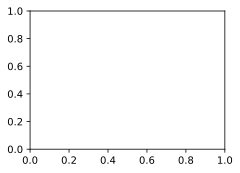

In [7]:
num_epochs = 10
d2l.train_ch13(net, train_iter, test_iter, loss, num_epochs, trainer)